# Learning maps in R, part 2

So last time I ambitiously got a data frame with the 1000 most populous cities in the US, thinking I would be constructing all sorts of maps from it.  Then I got distracted by drawing "goofy" state maps, and messed around with that for awhile.

Loading required package: jsonlite


city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
New York,4.8%,40.71278,-74.00594,8405837,1,New York
Los Angeles,4.8%,34.05223,-118.24368,3884307,2,California
Chicago,-6.1%,41.87811,-87.62980,2718782,3,Illinois
Houston,11.0%,29.76043,-95.36980,2195914,4,Texas
Philadelphia,2.6%,39.95258,-75.16522,1553165,5,Pennsylvania
Phoenix,14.0%,33.44838,-112.07404,1513367,6,Arizona


Loading required package: ggplot2
Loading required package: maps


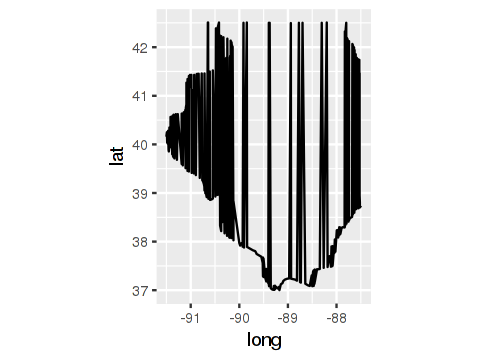

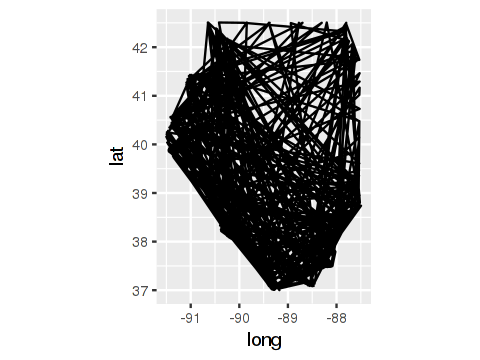

In [1]:
#---what I hoped to be doing, last time
require(jsonlite)
fromJSON("cities.json")->dat
head(dat)

#---what I really ended up doing...
require(ggplot2)
require(maps)

#---state boundary
IL<-subset(
    map_data("state"),
    region=="illinois"
)

#---resize plots
options(
    repr.plot.width=4, 
    repr.plot.height=3
)

#---silly graphs!!
ggplot(
    IL,
    aes(x=long,y=lat)
)+
geom_line()+
coord_fixed()


#---silly graphs!!
ggplot(
    IL[sample(nrow(IL)),],
    aes(x=long,y=lat)
)+
geom_path()+
coord_fixed()



### USA counties

Turns out that I tried making some more of these goofy "spaghetti" maps.  They're fun -- but soon I pulled myself away from that to wonder about the `map_data` function.  What other data did I have available?

Turns out I can dig deeper and get county-level boundary data for the US: `map_data("county")`.  So, I thought -- maybe I can create a geography quiz -- I highlight one of these US counties, at random, and then the county name can be displayed.  It'll give me practice working with the maps:  plotting them, and highlighting one region at random.  And then, making it all interactive will get me experimenting with a [shiny app](https://www.shinyapps.io/) -- something I tried about a year ago, but I want to re-aquaint myself with.

Goal set:  county-level USA data, maps with highlighted counties, and then a shiny app to tie it all together.  First, plotting a county map for any given state.

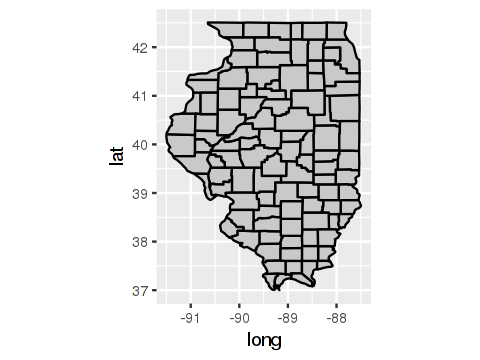

In [5]:
#---get USA county-level data
dat<-map_data("county")

#---focus on just illinois
IL<-subset(dat,region=="illinois")

#---ggplot!!
ggplot(
    #---Illinois county boundaries
    data=IL,
    #---aesthetics
    aes(
        #---long and lat
        x=long,
        y=lat,
        #---group county boundaries together
        group=subregion
    )    
)+

#---add geometry -- polygons!!
geom_polygon(
    #---set line color
    color="black",
    #---set fill color
    fill="grey79"
)+

#---aspect ratio!!!
coord_fixed()





Not bad!  Two things: 
- Don't need the labels on the axes,
- Need to change the fill color for a random county

For the first point, I've done enough `ggplot`, apart from maps, to know how to get at labels: `xlab(NULL)` for the axis titles, and `scale_x_continuous(breaks=NULL)` for the numbers.

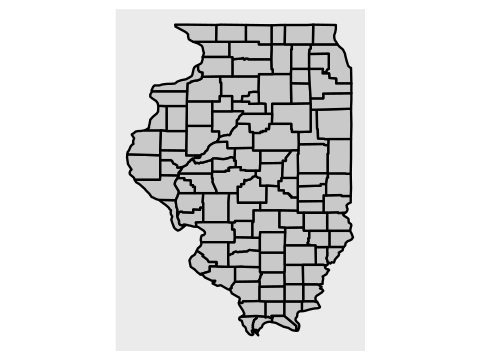

In [8]:
#---ggplot!!
ggplot(
    #---Illinois county boundaries
    data=IL,
    #---aesthetics
    aes(
        #---long and lat
        x=long,
        y=lat,
        #---group county boundaries together
        group=subregion
    )    
)+

#---add geometry -- polygons!!
geom_polygon(
    #---set line color
    color="black",
    #---set fill color
    fill="grey79"
)+

#---aspect ratio!!!
coord_fixed()+

#---get rid of axis titles!
xlab(NULL)+
ylab(NULL)+

#---get rid of numbers on the axes!!
scale_x_continuous(breaks=NULL)+
scale_y_continuous(breaks=NULL)

Okay!  The fill is a bit trickier.  First step, pick a random county to highlight.  Ok -- make a list of the county names, then pick one at random using `sample`.  What next??

I figured I'd create an 'identifier' vector that returns `TRUE` for all points on the boundary of the random county, and `FALSE` otherwise.  Add this identifier to the data frame, and then, `ggplot` would know from this identifier, how to distinguish colors when creating the map.

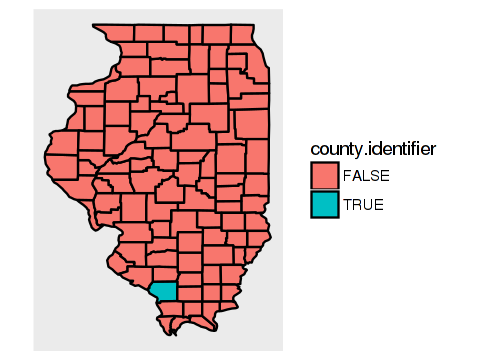

In [9]:
#---find all county names
county.names<-unique(IL$subregion)
#---pick one at random
random.county<-sample(county.names,1)

#---create identifier vector... simple logical test
county.identifier<-IL$subregion==random.county
#---add to data frame
IL<-data.frame(IL,county.identifier)

#---plot map, using identifier to distinguish color
#---ggplot!!
ggplot(
    #---Illinois county boundaries
    data=IL,
    #---aesthetics
    aes(
        #---long and lat
        x=long,
        y=lat,
        #---group county boundaries together
        group=subregion
    )    
)+

#---add geometry -- polygons!!
geom_polygon(
    #---set line color
    color="black",
    #---FILL COLOR DISTINGUISHED BY COUNTY IDENTIFIER!!!
    aes(fill=county.identifier)
)+

#---aspect ratio!!!
coord_fixed()+

#---get rid of axis titles!
xlab(NULL)+
ylab(NULL)+

#---get rid of numbers on the axes!!
scale_x_continuous(breaks=NULL)+
scale_y_continuous(breaks=NULL)

Ok!  A couple things:  

- There's no need for a legend.  `guide=NULL` will take care of that, I believe (why does `ggplot` call them guides?  Doesn't it talk about legends too?  Which is which for `ggplot`??)
- I would want to explicitly state what color goes with which type of dot.  I figure if I'm trying to draw attention to the random county, I'd need a bright color for all the `TRUE` dots.  Then a nice muted grey for the `FALSE` ones.  `scale_color_manual` would let me do that.

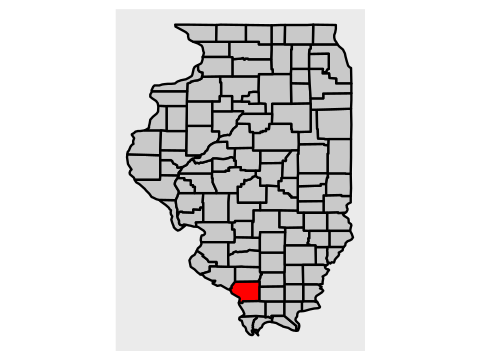

In [19]:
#---plot map, using identifier to distinguish color
#---ggplot!!
ggplot(
    #---Illinois county boundaries
    data=IL,
    #---aesthetics
    aes(
        #---long and lat
        x=long,
        y=lat,
        #---group county boundaries together
        group=subregion
    )    
)+

#---add geometry -- polygons!!
geom_polygon(
    #---set line color
    color="black",
    #---FILL COLOR DISTINGUISHED BY COUNTY IDENTIFIER!!!
    aes(fill=county.identifier)
)+

#---scale for fill allows custom setting of colors
scale_fill_manual(
    #---values is a named vector -- level and color.
    values=(
        c(
        "TRUE"="red",
        "FALSE"="grey79"
        )
    )
)+

#---no guide, err, legend, for fill
guides(fill="none")+

#---aspect ratio!!!
coord_fixed()+

#---get rid of axis titles!
xlab(NULL)+
ylab(NULL)+

#---get rid of numbers on the axes!!
scale_x_continuous(breaks=NULL)+
scale_y_continuous(breaks=NULL)

Ok!  A nice map!  But the interactivity of a shiny app would really make this sing.  I really had to wrestle with the basics of getting a shiny app working -- even though I made two very basic app's last year.

This notebook is for maps, so I'll try to document the shiny app process in new notebook.  These are going to keep on accumulating...   (but so will my coding skills!!)